# Graphs and Visualization

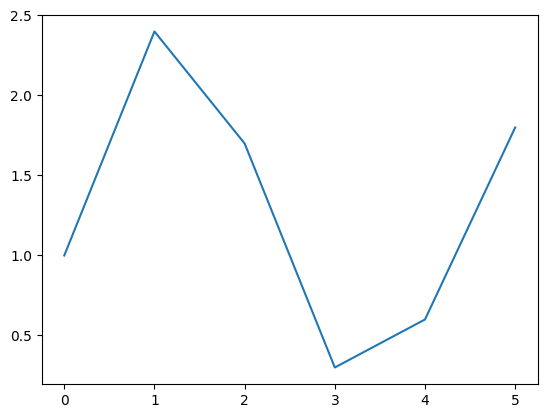

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

y = [1.0, 2.4, 1.7, 0.3, 0.6, 1.8]
plt.plot(y)
plt.show()

We should probably specify an x-axis

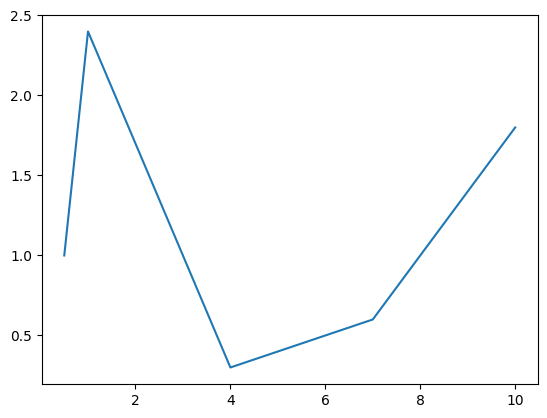

In [2]:
x = [0.5, 1.0, 2.0, 4.0, 7.0, 10.0] # x and y axis must have same number of elements
y = [1.0, 2.4, 1.7, 0.3, 0.6, 1.8]
plt.plot(x,y)
plt.show()

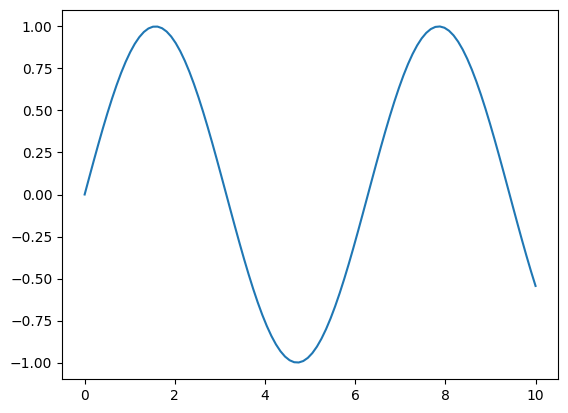

In [3]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

graphing the DJI. were going to use pandas because we arent boomers

In [4]:
import pandas as pd

data = pd.read_csv("./data/dow.txt")
data

,12121.71
0,12136.44
1,12226.73
2,12221.93
3,12194.13
4,12283.85
...,...
1018,11476.54
1019,11457.47
1020,11499.25
1021,11491.91


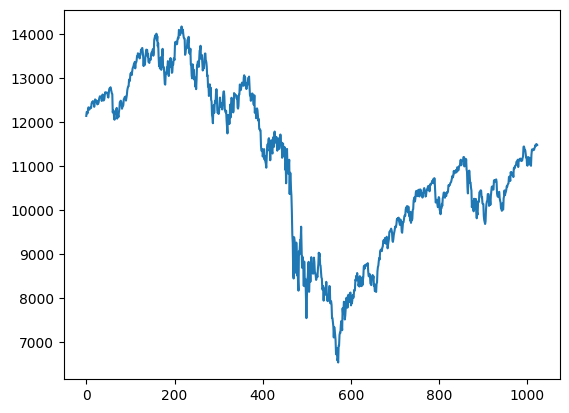

In [5]:
plt.plot(data)
plt.show()

This is much easier than using numpy loadtxt, slicing the np arrays, and then plotting x and y as the book suggests. but well do it both ways for the sake of understanding

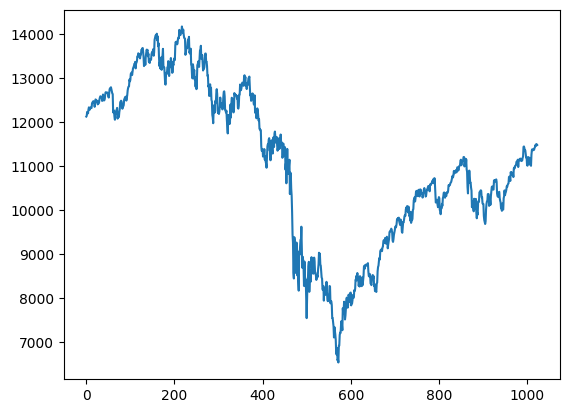

In [6]:
data = np.loadtxt("./data/dow.txt", float)

plt.plot(data)
plt.show()

Ok so the book and the data provided on the website are not the same, the book has a text file with "index value",  
our file has just a single column, the values, so it makes no real difference how we do it.  

We can easily add axis labels and specify the limits of our graph too

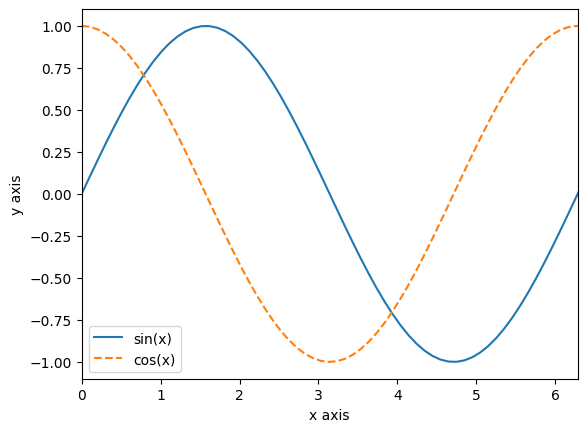

In [7]:
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1, label="sin(x)")
plt.plot(x,y2, "--", label="cos(x)") # dashed line

plt.ylim(-1.1, 1.1) # limit viewing window in y direction, lower and upper bound
plt.xlim(0, 2*math.pi) # limit viewing window in x direction, lower and upper bound

plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()

### Exercise 3.1: Plotting Experimental Data
the file sunspots.txt in the data directory contains the observed number of sunspots on the Sun for each month since January 1749.  
The file contains two columns of numbers, the first column is the month index, and the second is the number of sunspots during that month.

a) Write a program that reads in the data and makes a graph of sunspots as a function of time  
b) Modify your program to read in the first 1000  
c) Modify your program to further calculate and plot the running average of the data defined by:  
    
$$ Y_k = \frac{1}{2r + 1} \sum_{m=-r}^{r} Y_{k+m}  $$

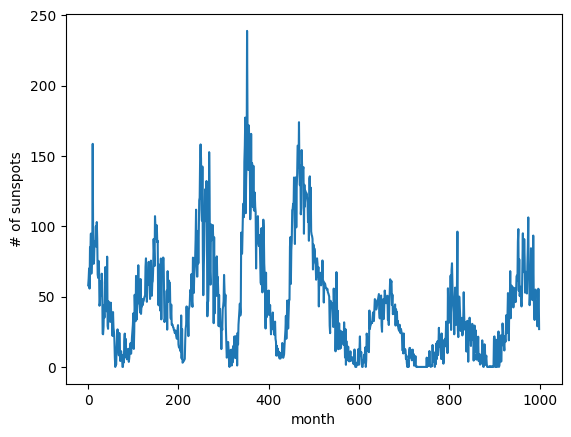

In [8]:
df = pd.read_csv("./data/sunspots.txt", names=["month", "sunspots"])

plt.plot(df[:1000]["sunspots"])

plt.xlabel("month")
plt.ylabel("# of sunspots")

plt.show()

The book now asks us to create a graph of the 11-month moving average of this data:

$$ Y_k = \frac{1}{2r + 1} \sum_{m=-r}^{r} Y_{k+m}  $$

It does not specify what to do about each end of the data so I will assume we should maintain a symmetric window to avoid phase shift.

In [9]:
data = np.loadtxt("./data/sunspots.txt", float, delimiter=",")[:1000]

def rolling_avg(data, r=5):
    avgs = np.zeros([1000,1], float)
    i = 0

    while i < 1000:
        if i < r:
            range = data[(i - i):(i + (i + 1))][:,1]
            avg   = sum(range) / (i + (i + 1))
            avgs[i] += avg
        elif 999 - i <= r:
            range = data[i:1000][:,1]
            avg   = sum(range) / ((999-i) + 1)
            avgs[i] += avg
        else:
            range = data[i - r:i + 6][:,1]
            avg   = sum(range) / (2*r + 1)
            avgs[i] += avg
        i += 1
    
    return avgs

avgs = rolling_avg(data)
data = np.column_stack([data, avgs])
print(data)

[[  0.          58.          58.        ]
 [  1.          62.6         63.53333333]
 [  2.          70.          66.26      ]
 ...
 [997.          55.6         45.86666667]
 [998.          55.1         41.        ]
 [999.          26.9         26.9       ]]


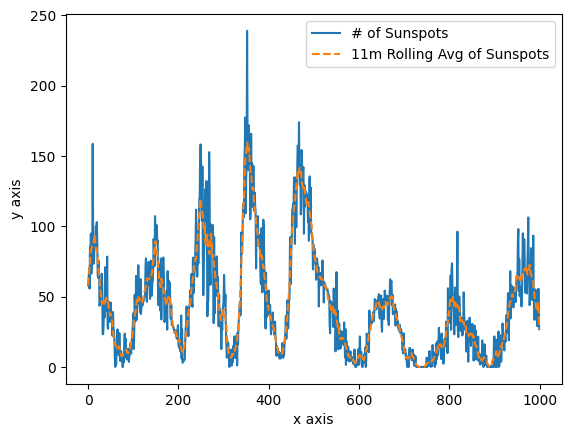

In [10]:
x  = data[:,0]
y1 = data[:,1]
y2 = data[:,2]

plt.plot(x,y1, label="# of Sunspots")
plt.plot(x,y2, "--", label="11m Rolling Avg of Sunspots") # dashed line

plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()

### Exercise 3.2: Curve Plotting

Although we primarily use plt.plot for plotting standard x,y graphs, it can be adapted to other problems.  

#### Book exercise instructions:

**a.) graph the deltoid curve defined by:**

$$\ x = 2\cos(\theta) + \cos(2\theta) \\ y = 2\sin(\theta) - \sin(2\theta) $$

over the interval:

$$\ 0 \leq \theta \lt 2\pi $$

**b.) plot the Galilean spiral defined by:**

$$\ r = \theta^2 $$
for:
$$\ 0 \leq \theta \leq 10\pi $$

**c.) Plot "Fey's function" defined by:**

$$\ r = e^{\cos(\theta)} - 2\cos(4\theta) + \sin^5(\frac{\theta}{12}) $$
for:
$$\ 0 \leq \theta \leq 24\pi $$

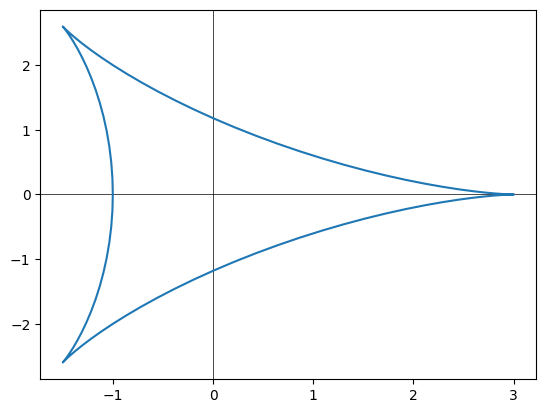

In [11]:
# Part a.) Graph the Deltoid Curve
theta = np.linspace(0, 2*math.pi, 100, endpoint=False) # endpoint is false because interval = [0, 2pi)

x = 2*np.cos(theta) + np.cos((2*theta))
y = 2*np.sin(theta) - np.sin((2*theta))

plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

plt.plot(x,y)
plt.show()

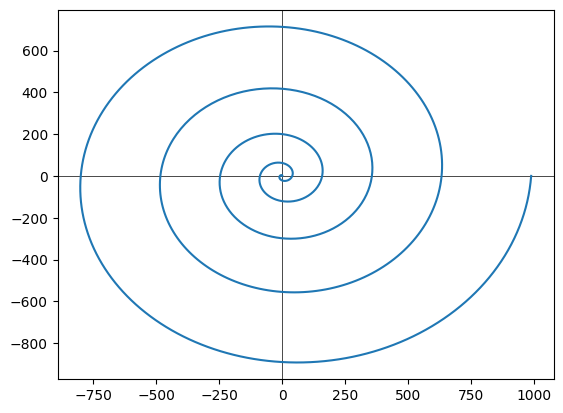

In [12]:
# Part b.) Plot the Galilean Spiral
theta = np.linspace(0, 10*math.pi, 1000)

r = theta**2

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

plt.plot(x,y)
plt.show()

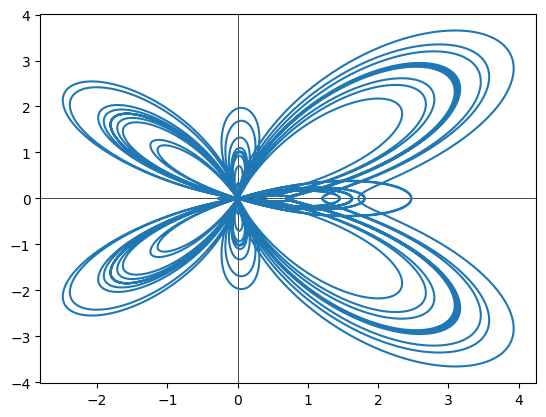

In [13]:
# Part c.) Plot Fey's Function
theta = np.linspace(0, 24*math.pi, 10000)

r = (math.e**np.cos(theta)) - (2*np.cos((4*theta))) + (np.sin((theta/12)))**5
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

plt.plot(x,y)
plt.show()

## 3.2 Scatter Plots

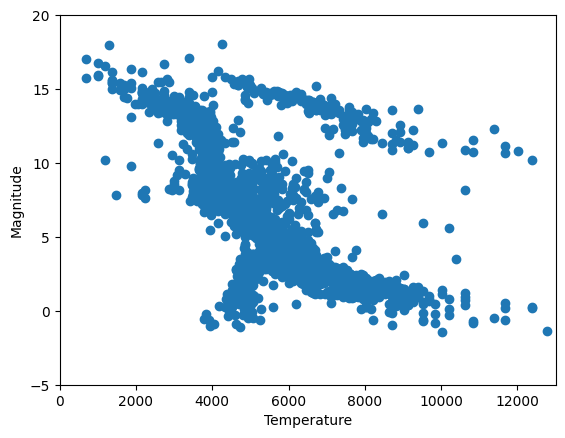

In [14]:
stars = np.loadtxt("./data/stars.txt", float)

x = stars[:,0]
y = stars[:,1]

plt.scatter(x,y)

plt.xlabel("Temperature")
plt.xlim(0,13000)

plt.ylabel("Magnitude")
plt.ylim(-5,20)

plt.show()


## 3.3 Density Plots

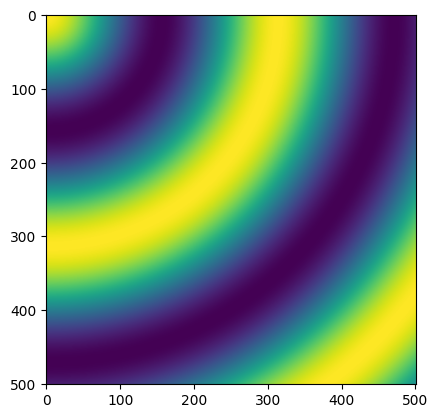

In [15]:
data = np.loadtxt("./data/circular.txt", float)

plt.imshow(data)
plt.show()

The above density plot is a visual representation of the values contained in the file `circular.txt`.  
The massive 2D array has values ranging from -1 to 1, with 1 being shown as the lightest color, and -1 the darkest.  
the numbers along both axes represent the indices of the 2D array, the y-axis representing the row index, and the x-axis the column index.  

Having just finished linear algebra, this makes plenty of sense to me, but you can reverse the order with:

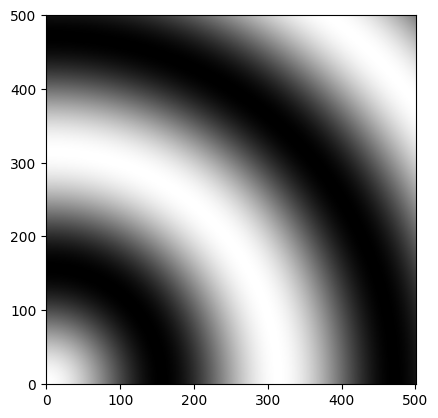

In [16]:
data = np.loadtxt("./data/circular.txt", float)

plt.imshow(data, origin="lower") # origin="lower" reverses order

# various color themes to choose from:
# plt.jet()
# plt.hot()
# plt.bone()
# plt.hsv()
plt.gray() # change plot to grayscale

plt.show()

we can actually combine all forms of graphs all into one plot:

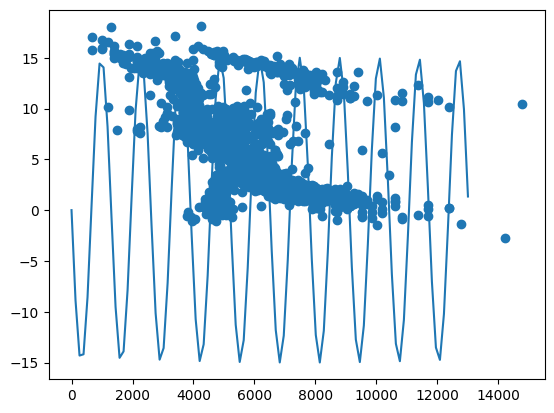

In [17]:
x_line = np.linspace(0, 13000, 100)
y_line = 15*np.sin(x_line)

plt.plot(x_line,y_line)


scatter = np.loadtxt("./data/stars.txt", float)

x_scatter = scatter[:,0]
y_scatter = scatter[:,1]

plt.scatter(x_scatter, y_scatter)

plt.show()

leaving off the density plot because its dimensions dont really work with these other graphs

Example 3.1: Wave Interference

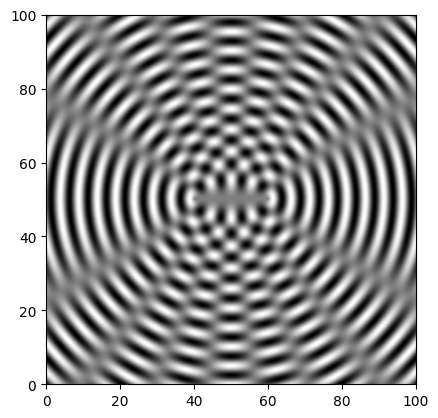

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

wavelength = 5.0
k = 2*math.pi/wavelength
xi0 = 1.0
separation = 20 # distance between two wave centers
side = 100 # side of matrix in cm
points = 500 # number of grid points along each axis
spacing = side/points # distance between two points in cm

# positions of centers of circles
x1 = side/2 + separation/2
y1 = side/2

x2 = side/2 - separation/2
y2 = side/2

# array to store wave heights
xi = np.empty([points,points], float)

for i in range(points):
  y = spacing*i
  for j in range(points):
    x = spacing*j
    r1 = math.sqrt((x-x1)**2 + (y-y1)**2)
    r2 = math.sqrt((x-x2)**2 + (y-y2)**2)

    xi[i,j] = xi0*math.sin(k*r1) + xi0*math.sin(k*r2) # wave heights sum

plt.imshow(xi, origin="lower", extent=[0,side,0,side])
plt.gray()
plt.show()


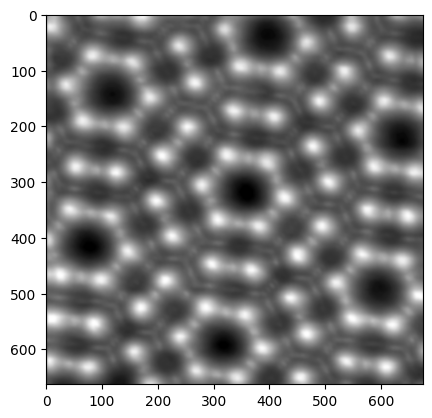

In [19]:
# Exercise 3.3
data = np.loadtxt("./data/stm.txt", float)

plt.imshow(data)
plt.gray()
plt.show()